In [2]:
import pandas as pd
import mlflow
import matplotlib.pyplot as plt

import sys
import os
if 'src' not in sys.path:
    sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from explainability import plot_shap_global, plot_shap_local

c:\Users\lepot\Documents\dataAnalysis\dataAnalysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\lepot\Documents\dataAnalysis\dataAnalysis\.venv\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:177: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance.
  return FileStore(store_uri, store_uri)


Calcul des valeurs SHAP globales (cela peut prendre du temps)...


c:\Users\lepot\Documents\dataAnalysis\dataAnalysis\.venv\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


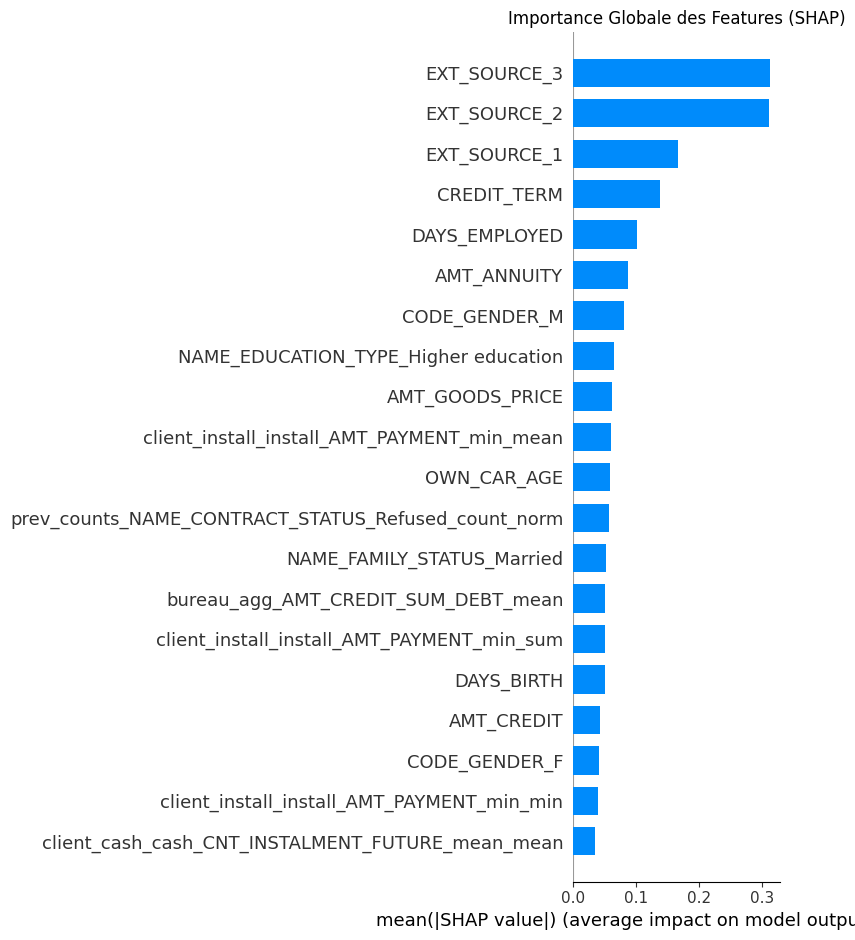

In [3]:
mlflow.set_tracking_uri("file:../mlruns")

# 1. Charger les données (Test set cette fois, ou Val)
df_test = pd.read_csv('../datasets/final/test_enriched.csv')
# SHAP a besoin de données sans NaNs si le modèle ne les gère pas, 
# mais LightGBM les gère, donc on peut passer df_test direct.
X_shap = df_test 

# 2. Charger le modèle
# ID du modèle LightGBM
RUN_ID = "08b111e7a95b4eb487c670bd3bc29655" 
model_uri = f"runs:/{RUN_ID}/model"
model = mlflow.sklearn.load_model(model_uri)

# 3. Appeler les fonctions
plot_shap_global(model, X_shap)
plt.show()

Calcul du SHAP local pour le client à l'index 1200...


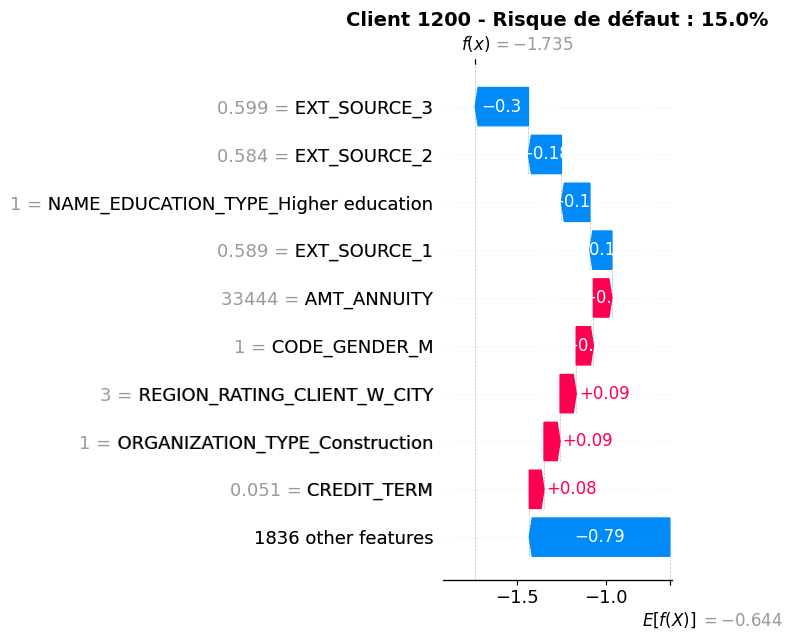

In [4]:
# 3. Appeler les fonctions
plot_shap_local(model, X_shap,1200)
plt.show()